## Import packages

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

## EDA of osnaca-data

In [2]:
#Read the osnaca-data and osnaca-metadata
osnaca_data = pd.read_excel('../data/osnaca-data.xlsx', sheet_name = 'Data')
osnaca_clon = pd.read_excel('../data/osnaca-data.xlsx', sheet_name = 'Cloncurry Supplement')

In [3]:
osnaca_data.head() #top five rows of osnaca data

,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,...,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge,Wt Tot
0,700001,NaN,0.438,0.002,0.002,0.362,10.60,0.02,0.39,91.5,...,1.2,153000,-20,0.4,34200,60,-1.0,11.0,1,159
1,700002,NaN,0.093,0.001,0.002,0.095,125.00,0.22,0.12,44.0,...,18.5,3780,-20,0.2,114000,20,-1.0,2.0,-1,143
2,700003,NaN,1.41,0.002,0.002,1.39,120.00,0.02,62.9,215.0,...,0.3,219000,-20,-0.2,71500,-10,-1.0,-1.0,2,204
3,700004,1,0.096,0.003,0.005,0.086,0.72,0.80,0.03,2.5,...,6.3,755,-20,2.0,244000,70,-1.0,-1.0,-1,185
4,700005,NaN,2.9,0.003,0.005,3.94,0.34,0.06,4.01,162.0,...,4.5,173000,-20,-0.2,142000,-10,-1.0,-1.0,2,280


In [4]:
osnaca_clon.head() #top five rows of osnaca cloncurry supplement

,Sample,Code,Code Tester,Au1,Pt,Pd,Au(AR),Bi,Te,Hg,...,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge,Wt Total
0,ALT010,NaN,NaN,0.039,0.002,-0.001,NaN,1.20,0.44,12.80,...,7.1,6760,-20,1.2,91800,40,4.2,16.6,4,164.0
1,ALT024,NaN,NaN,0.011,-0.001,0.002,NaN,0.20,0.10,0.02,...,14.6,1390,-20,22.0,64300,900,12.2,25.8,3,140.0
2,ALT073,NaN,NaN,0.436,0.004,0.007,NaN,0.30,0.22,1.30,...,15.1,1510,-20,2.0,127000,70,17.0,32.4,12,109.0
3,ALT074,NaN,NaN,0.508,0.002,0.002,NaN,24.70,1.80,3.91,...,3.6,14500,20,0.4,40300,4,0.9,5.6,1,NaN
4,ART013,1.0,1.0,-0.001,0.001,-0.001,NaN,0.08,-0.02,-0.01,...,41.0,225,80,5.6,248000,156,6.0,33.4,1,NaN


Get columns with NA values

In [5]:
osnaca_data.columns[ osnaca_data.isnull().any() ].tolist()    

['Code', 'Wt Tot']

In [6]:
osnaca_clon.columns[ osnaca_clon.isnull().any() ].tolist()    

['Code', 'Code Tester', 'Au(AR)', 'Wt Total']

Get the difference columns between data and cloncurry

In [7]:
set(osnaca_clon.columns).difference(set(osnaca_data.columns))

{'Au(AR)', 'Au1', 'Code Tester', 'Wt Total'}

In [8]:
set(osnaca_data.columns).difference(set(osnaca_clon.columns))

{'Au (AR)', 'Au (FA)', 'Wt Tot'}

In [9]:
#Keep their variable names consistent
osnaca_data = osnaca_data.drop(['Sample', 'Code', 'Wt Tot'], axis=1)
osnaca_clon = osnaca_clon.drop(['Code','Code Tester','Sample','Wt Total'], axis = 1)
osnaca_clon = osnaca_clon.rename(columns={"Au(AR)": "Au (AR)", "Au1": "Au (FA)"})

In [10]:
#Merge the two data
osnaca = pd.concat([osnaca_data, osnaca_clon])

In [11]:
#Get a quick description of the merge data
osnaca.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 71
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Au (FA)  1211 non-null   object 
 1   Pt       1211 non-null   object 
 2   Pd       1211 non-null   object 
 3   Au (AR)  1139 non-null   object 
 4   Bi       1211 non-null   float64
 5   Te       1211 non-null   float64
 6   Hg       1211 non-null   object 
 7   Ag       1211 non-null   float64
 8   Al       1211 non-null   int64  
 9   As       1211 non-null   int64  
 10  Ca       1211 non-null   int64  
 11  Cd       1211 non-null   float64
 12  Co       1211 non-null   int64  
 13  Cr       1211 non-null   int64  
 14  Cs       1211 non-null   float64
 15  Cu       1211 non-null   int64  
 16  Fe       1211 non-null   int64  
 17  In       1211 non-null   float64
 18  K        1211 non-null   int64  
 19  La       1211 non-null   float64
 20  Ce       1211 non-null   float64
 21  Pr       1211 no

In [12]:
#Convert the data type to float
osnaca=osnaca.replace("IS", 0)# ValueError: could not convert string to float: 'IS'
osnaca = pd.DataFrame(osnaca,dtype=np.float)

In [13]:
osnaca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 71
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Au (FA)  1211 non-null   float64
 1   Pt       1211 non-null   float64
 2   Pd       1211 non-null   float64
 3   Au (AR)  1139 non-null   float64
 4   Bi       1211 non-null   float64
 5   Te       1211 non-null   float64
 6   Hg       1211 non-null   float64
 7   Ag       1211 non-null   float64
 8   Al       1211 non-null   float64
 9   As       1211 non-null   float64
 10  Ca       1211 non-null   float64
 11  Cd       1211 non-null   float64
 12  Co       1211 non-null   float64
 13  Cr       1211 non-null   float64
 14  Cs       1211 non-null   float64
 15  Cu       1211 non-null   float64
 16  Fe       1211 non-null   float64
 17  In       1211 non-null   float64
 18  K        1211 non-null   float64
 19  La       1211 non-null   float64
 20  Ce       1211 non-null   float64
 21  Pr       1211 no

Replace missing values with the mean of the Au (AR) column

In [14]:
osnaca['Au (AR)'] = osnaca['Au (AR)'].fillna(osnaca['Au (AR)'].mean())

In [15]:
osnaca_corr = osnaca.corr()
osnaca_corr

,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,Al,As,...,W,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge
Au (FA),1.000000,-0.006193,-0.007821,0.984925,0.004101,0.110835,0.019320,0.231008,-0.000821,-0.007497,...,-0.005197,-0.016120,-0.027520,-0.010609,-0.025338,0.094532,-0.023097,-0.005607,-0.021335,-0.013568
Pt,-0.006193,1.000000,0.491803,-0.006751,-0.003686,-0.000487,-0.003923,-0.009147,0.025865,-0.014936,...,-0.005369,-0.023090,-0.030542,-0.006576,-0.027311,-0.032898,-0.030974,-0.005246,-0.005350,-0.021184
Pd,-0.007821,0.491803,1.000000,-0.008414,-0.004682,0.004733,-0.005126,-0.011334,-0.046146,-0.019103,...,-0.006923,-0.031987,-0.039691,-0.008006,-0.029378,-0.097898,-0.034605,-0.006861,-0.032783,-0.026570
Au (AR),0.984925,-0.006751,-0.008414,1.000000,0.000256,0.108203,0.018561,0.222119,-0.003929,-0.008551,...,-0.005608,-0.016855,-0.029839,-0.011656,-0.026063,0.086552,-0.025231,-0.006019,-0.022862,-0.015413
Bi,0.004101,-0.003686,-0.004682,0.000256,1.000000,-0.002577,-0.002256,-0.005049,-0.023573,-0.006228,...,0.008942,-0.004615,-0.016433,-0.003537,-0.014202,-0.044456,-0.014624,-0.001152,0.001875,0.005958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Si,0.094532,-0.032898,-0.097898,0.086552,-0.044456,0.027539,-0.047998,-0.051214,0.464052,-0.038995,...,0.017274,-0.019849,-0.378327,0.045042,0.219278,1.000000,0.244672,0.019268,0.012876,-0.185344
Zr,-0.023097,-0.030974,-0.034605,-0.025231,-0.014624,-0.026443,-0.013123,-0.054001,0.472575,-0.021262,...,-0.006705,0.284951,-0.168736,0.025004,0.818945,0.244672,1.000000,-0.002009,0.106565,-0.077823
Be,-0.005607,-0.005246,-0.006861,-0.006019,-0.001152,-0.005681,-0.003077,-0.007258,0.079561,-0.009475,...,0.008778,-0.005662,-0.022721,0.125111,0.062151,0.019268,-0.002009,1.000000,0.128287,0.011411
Ga,-0.021335,-0.005350,-0.032783,-0.022862,0.001875,-0.017651,0.076336,0.035209,0.234772,-0.037473,...,-0.006445,0.370416,0.061873,0.050155,0.156872,0.012876,0.106565,0.128287,1.000000,0.152727


<AxesSubplot:>

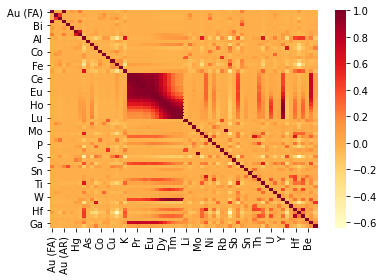

In [16]:
sns.heatmap(osnaca_corr, cmap="YlOrRd")

## Feature Scaling

In [17]:
print("Maximum before standard scaling:\n", np.max(osnaca),'\n')

Maximum before standard scaling:
 Au (FA)     10800.0
Pt             15.2
Pd             15.1
Au (AR)     11500.0
Bi         138000.0
             ...   
Si         459000.0
Zr           2230.0
Be           3300.0
Ga            580.0
Ge            338.0
Length: 66, dtype: float64 



In [18]:
scaler = MinMaxScaler()
osnaca_scaled = scaler.fit_transform(osnaca)

In [19]:
osnaca_scaled = pd.DataFrame(osnaca_scaled)
osnaca_scaled.columns = osnaca.columns
osnaca_scaled.head()

,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,Al,As,...,W,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge
0,0.000041,0.000197,0.000199,0.000032,0.000077,0.000030,0.000026,0.004488,0.017381,0.000709,...,0.000014,0.002053,0.228364,0.0,0.006369,0.074106,0.031250,0.0,0.020654,0.00590
1,0.000009,0.000132,0.000199,0.000008,0.000906,0.000080,0.000008,0.002159,0.163873,0.000169,...,0.000022,0.029379,0.005649,0.0,0.004246,0.248038,0.013393,0.0,0.005164,0.00000
2,0.000131,0.000197,0.000199,0.000121,0.000870,0.000030,0.004059,0.010542,0.001241,0.010713,...,0.000036,0.000632,0.326871,0.0,0.000000,0.155405,0.000000,0.0,0.000000,0.00885
3,0.000009,0.000263,0.000397,0.000008,0.000005,0.000224,0.000003,0.000125,0.235258,0.000027,...,0.000014,0.010109,0.001134,0.0,0.023355,0.531386,0.035714,0.0,0.000000,0.00000
4,0.000269,0.000263,0.000397,0.000343,0.000003,0.000040,0.000259,0.007944,0.122284,0.002247,...,0.000040,0.007266,0.258214,0.0,0.000000,0.309067,0.000000,0.0,0.000000,0.00885


In [20]:
X = osnaca_scaled.drop(['Zn'], axis =1)
y = osnaca_scaled['Zn']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(len(X_train), "train +", len(X_test), "test")

968 train + 243 test


## Multiple Linear Regression Model 

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
y_lm_pred= lm.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  

print("intercept:",lm.intercept_)
print("MSE: ", mean_squared_error(y_test,y_lm_pred))
print("MAE: ", mean_absolute_error(y_test,y_lm_pred))
print("R-squared:", r2_score(y_test,y_lm_pred))
print("score of the linear model: ", lm.score(X_test,y_test),"\n")
#Output the coefficient matrix of each feature of the multiple regression algorithm
print("coefficient matrix: \n", lm.coef_,"\n")      
#Output the coefficient sorting of each feature of the multiple linear regression algorithm, 
#you can know the influence of each feature
print("coefficient sorting of each feature: \n", np.argsort(lm.coef_),"\n")  
#Output each feature in the order of impact coefficient from small to large
print("impact coefficient from small to large: \n", osnaca_scaled.columns[np.argsort(lm.coef_)])  

intercept: 0.5312288051674627
MSE:  0.2875301775892014
MAE:  0.07910697768204591
R-squared: -12.552325492624092
score of the linear model:  -12.552325492624092 

coefficient matrix: 
 [ 0.88914028  0.06113851  0.03283117 -1.09753575 -0.15694133 -0.03495447
  0.12559005 -0.04100641 -0.19243048 -0.3888448  -0.46154074  0.44600804
 -0.07667291 -0.23130137 -0.01793128 -0.53040683 -0.60141896  0.04034604
 -0.04871867  0.46548863  0.77888144 -1.0438276  -1.70880673  1.12975303
  0.2574703   0.75369278 -3.46490894  1.93859306 -0.23125762  0.11584836
  0.10684472 -0.52686803 -0.02391854 -0.07449014 -0.37448666 -0.1121915
 -0.40196752 -0.03475608  0.45007855 -0.12343886  0.03368489 -0.43443969
 -0.07653531  0.16067885 -0.04729294 -0.42563299  0.10147832  0.11342678
 -0.47167048 -8.68814644 -0.77220212  0.14713055 -0.01089423 -0.01744438
 -0.00980535 -0.04294036 -0.16543681  0.25005535 -0.03300098 -0.03449628
 -0.53534664 -0.15625932 -0.08317219  0.48700224  0.454481  ] 

coefficient sorting of 

## Random Forrest Regression Model

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [31]:
y_rf_pred= rf.predict(X_test)

In [32]:
print("MSE: ", mean_squared_error(y_test,y_rf_pred))
print("MAE: ", mean_absolute_error(y_test,y_rf_pred))
print("R-squared:", r2_score(y_test,y_rf_pred))
print("score of the RF model: ", rf.score(X_test,y_test),"\n")

MSE:  0.0017307564274623391
MAE:  0.014332348051084812
R-squared: 0.918423260298846
score of the RF model:  0.918423260298846 

